In [1]:
import json
import os
import pandas as pd
import numpy as np



In [2]:
df = pd.DataFrame(columns=["id", "name", "conf", "oe", "de", "ne", "adjoe", "adjde", "adjne", "sos"])
for f in os.listdir("../data/web/ts_v2"):
    with open(f"../data/web/ts_v2/{f}") as file:
        d = json.load(file)
        df = df.append({
            "id": d["id"],
            "name": d["name"],
            "conf": d["conf"],
            "oe": d["stats"]["OE"],
            "de": d["stats"]["DE"],
            "ne": d["stats"]["NE"],
            "adjoe": d["stats"]["AdjOE"],
            "adjde": d["stats"]["AdjDE"],
            "adjne": d["stats"]["AdjNE"],
            "sos": d["sos"]
        }, ignore_index=True)

/var/folders/7y/1jp5fzbs05q03xszr7zmwvqw0000gn/T/ipykernel_26971/874303712.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/var/folders/7y/1jp5fzbs05q03xszr7zmwvqw0000gn/T/ipykernel_26971/874303712.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/var/folders/7y/1jp5fzbs05q03xszr7zmwvqw0000gn/T/ipykernel_26971/874303712.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/var/folders/7y/1jp5fzbs05q03xszr7zmwvqw0000gn/T/ipykernel_26971/874303712.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/var/folders/7y/1jp5fzbs05q03xszr7zmwvqw0000gn/T/ipykernel_26971/874

In [3]:
df.head(5)

,id,name,conf,oe,de,ne,adjoe,adjde,adjne,sos
0,1214,Hampton,big_south,108.810,107.196,1.615,103.692,114.727,-11.035,0.461
1,1177,DePaul,big_east,105.717,109.904,-4.187,112.390,98.855,13.535,0.563
2,1396,Temple,aac,99.274,92.648,6.626,101.549,88.420,13.129,0.542
3,1202,Furman,southern,106.935,101.156,5.778,107.693,103.254,4.439,0.464
4,1244,Kennesaw,a_sun,103.437,106.141,-2.704,101.017,109.636,-8.619,0.483


In [4]:
df["AdjOEDiff"] = df["adjoe"] - df["oe"]
df["AdjDEDiff"] = df["adjde"] - df["de"]
df["AdjNEDiff"] = df["adjne"] - df["ne"]

In [23]:
for k,v in df.groupby("conf")[["AdjOEDiff"]].mean().sort_values("AdjOEDiff").items():
    print(k, v)
for k,v in df.groupby("conf")[["AdjDEDiff"]].mean().sort_values("AdjDEDiff").items():
    print(k, v)

AdjOEDiff conf
swac         -7.754881
meac         -6.664217
gwc          -6.084960
nec          -4.714449
aec          -4.373936
southland    -4.111602
patriot      -3.877354
big_south    -3.399667
ind          -2.791943
ivy          -2.533256
a_sun        -2.480220
maac         -2.240004
ovc          -2.161424
big_sky      -1.666986
big_west     -1.552183
sun_belt     -1.165791
wac          -0.703638
southern     -0.457233
summit       -0.420082
mid_cont     -0.208186
horizon      -0.021679
caa           0.059548
cusa          0.188598
mac           0.492404
mvc           1.841411
aac           1.993040
wcc           2.678719
a_ten         2.824584
mwc           3.347264
pac_twelve    5.167019
sec           5.464260
big_twelve    5.693492
big_ten       5.855996
pac_ten       5.984267
acc           6.069424
big_east      6.246541
Name: AdjOEDiff, dtype: float64
AdjDEDiff conf
big_east      -9.206331
big_twelve    -9.205021
acc           -9.132514
big_ten       -9.117647
sec           

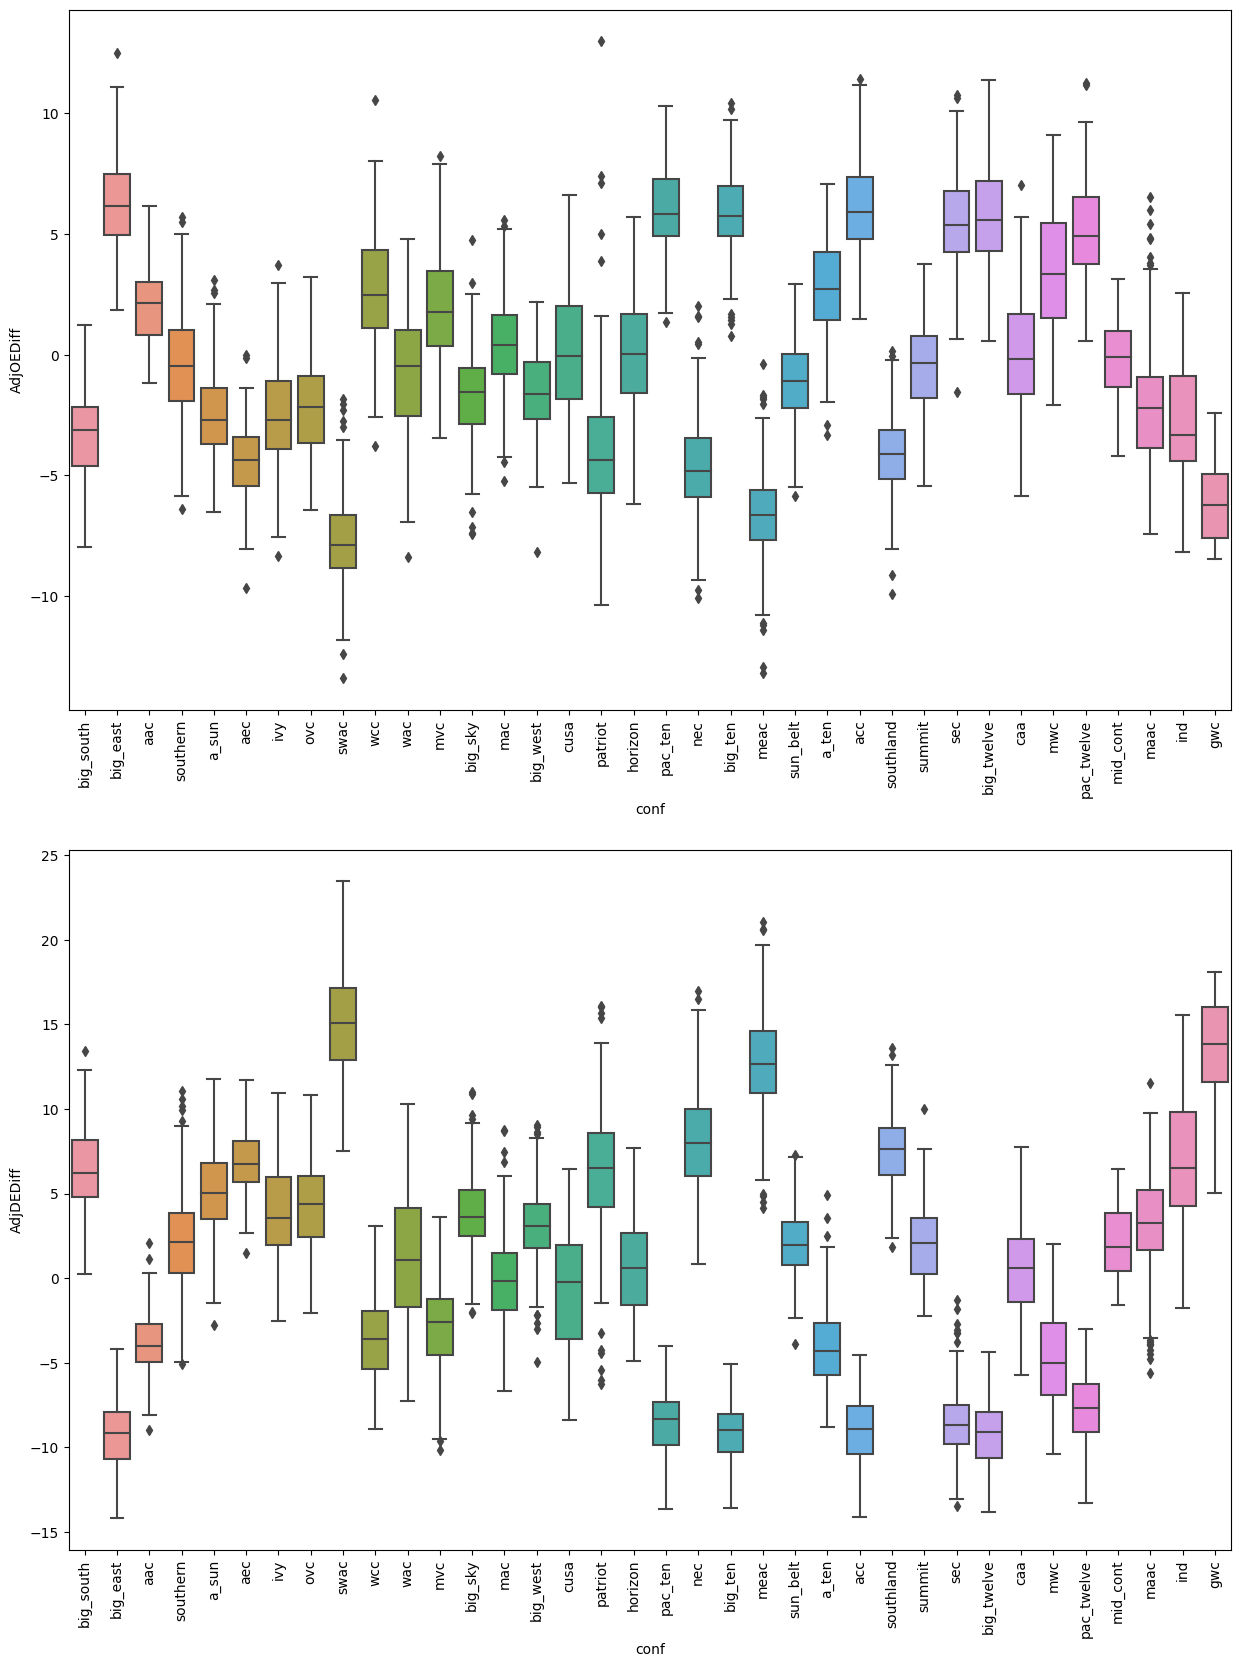

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# Make one box and whisker plot for each conference for the adjusted offensive efficiency and another for the adjusted defensive efficiency
fig, ax = plt.subplots(2, 1, figsize=(15, 20))
sns.boxplot(x="conf", y="AdjOEDiff", data=df, ax = ax[0])
ax[0].xaxis.set_tick_params(rotation=90)

sns.boxplot(x="conf", y="AdjDEDiff", data=df, ax = ax[1])
plt.xticks(rotation=90)
plt.show()